In [1]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13
plt.rcParams["figure.figsize"]=(10,8)
plt.style.use('dark_background')

In [2]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [3]:
data = sdf.read(all_files[0])

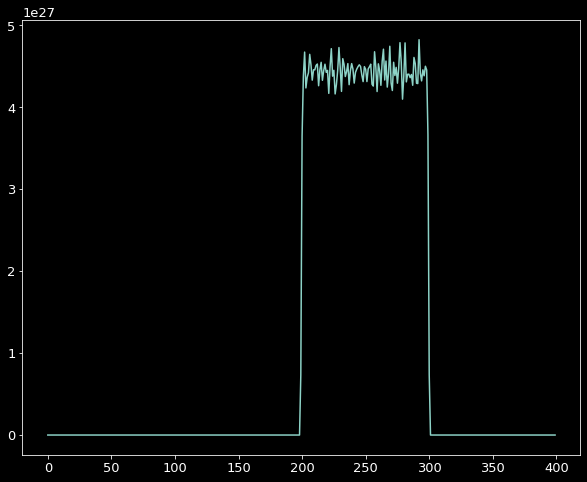

In [4]:
plt.plot(data.Derived_Number_Density_Electron.data)

In [5]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

In [6]:
Ey = get_field(40)

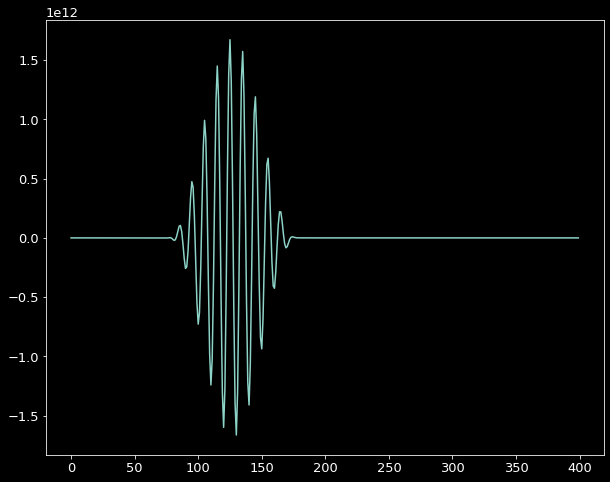

In [7]:
# plt.figure(figsize=(8, 8))
plt.plot(Ey)

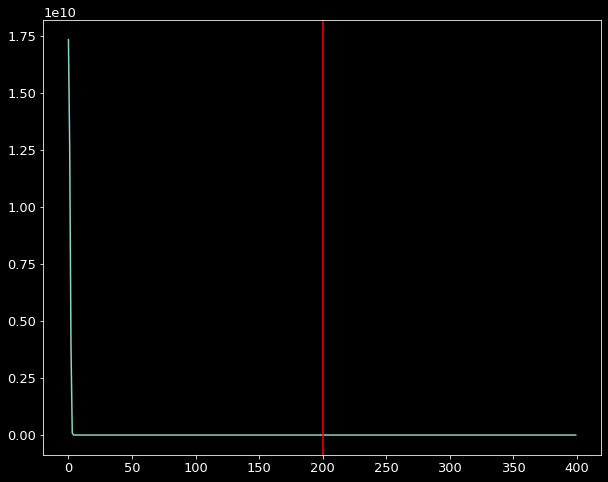

In [8]:
Ey = get_field(1)
plt.plot(Ey)
plt.axvline(200, color="red")
plt.show()

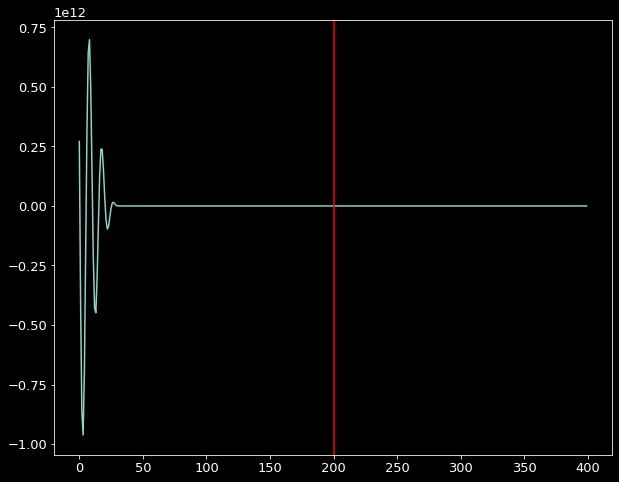

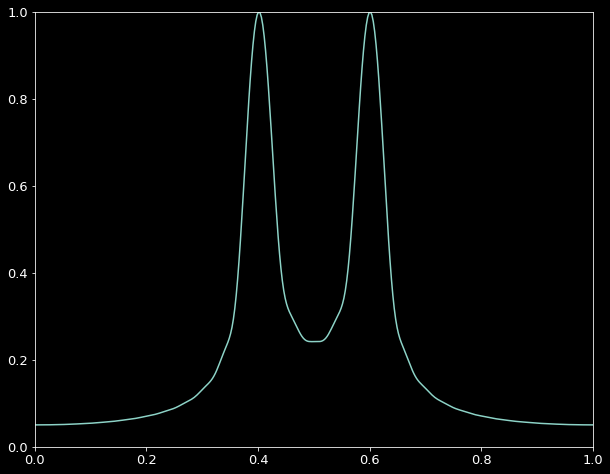

In [9]:
Ey = get_field(10)
plt.plot(Ey)
plt.axvline(200, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 400), Ey_f/np.max(Ey_f))
plt.axvline(200, color="red")
plt.xlim(0,1)
plt.ylim(0,1);

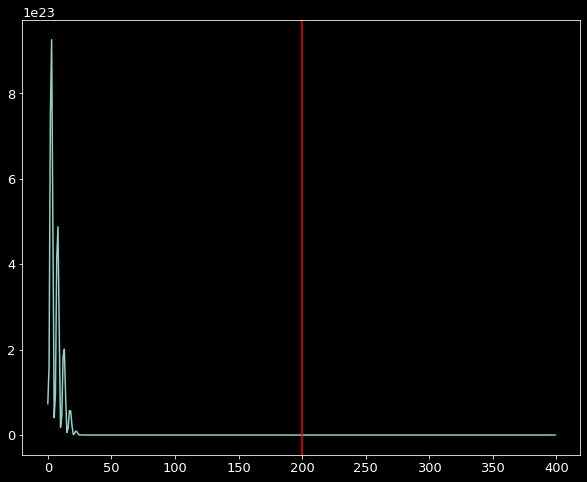

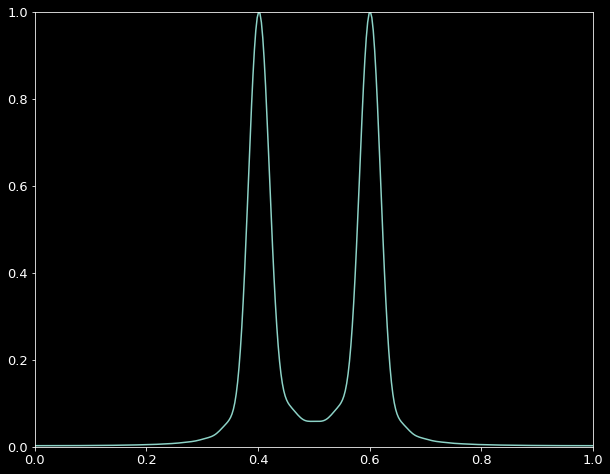

In [10]:
Ey = get_field(10)
plt.plot(Ey**2)
plt.axvline(200, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 400), Ey_f**2/np.max(Ey_f**2))
plt.axvline(200, color="red")
plt.xlim(0,1)
plt.ylim(0,1);

In [11]:
def p1(x):
    if x>0:
        return 1
    return 0

def p2(x):
    if x>10:
        return 0
    return 1

In [32]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [33]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i)
    all_field.append(data)
    Et1.append(data[50])
    Et2.append(data[170])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)

In [48]:
d = np.array(d)
d.shape

(221, 400)

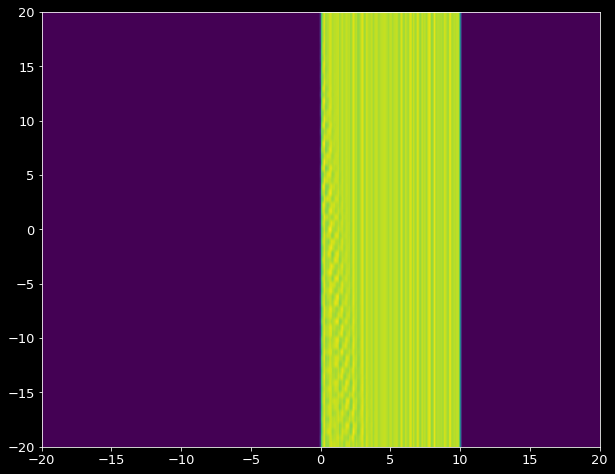

In [50]:
plt.imshow(d[150:]/np.max(d), aspect="auto", extent=EXTENT)


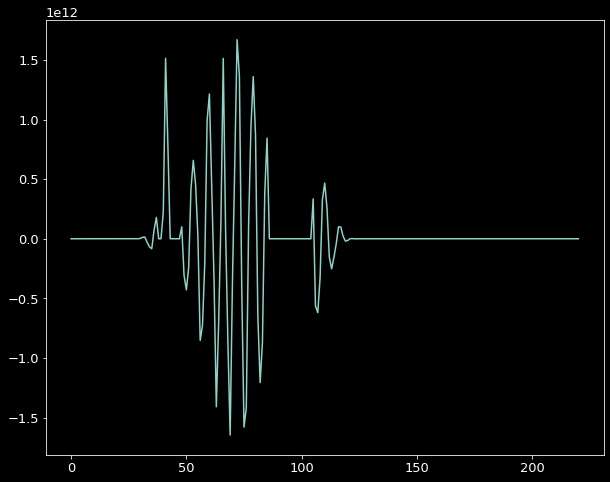

In [35]:
plt.plot(Et1)

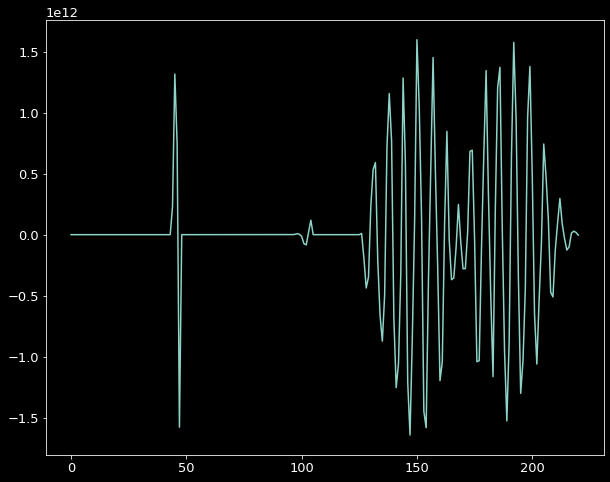

In [36]:
plt.plot(Et2)

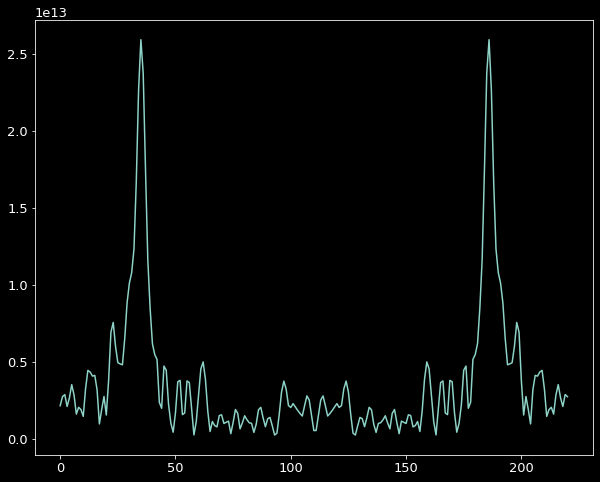

In [37]:
plt.plot(np.abs(np.fft.fft(Et1)))

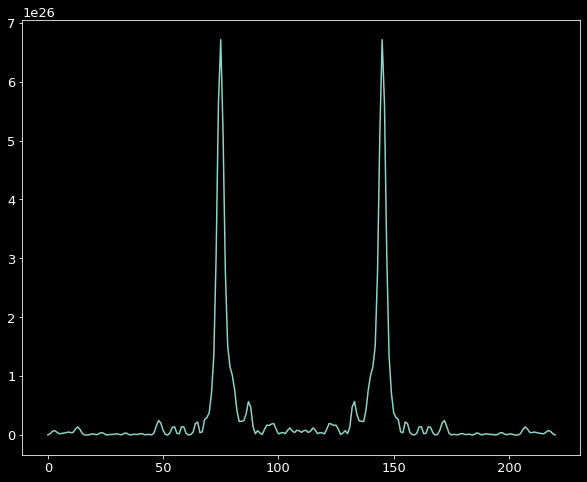

In [38]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2)

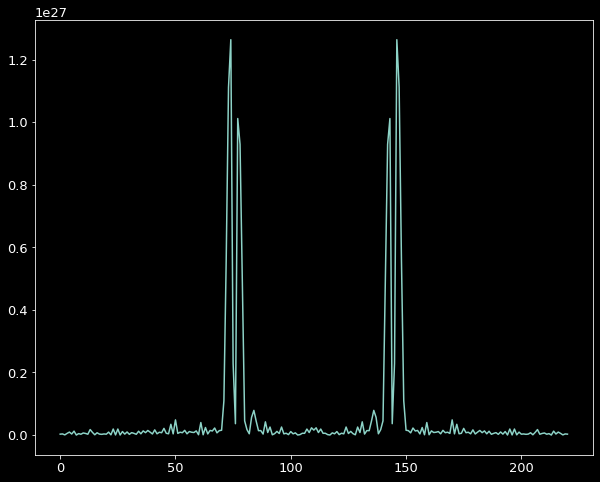

In [39]:
eyt = np.abs(np.fft.fft(np.array(Et2)))
eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2)

# FT

In [40]:
import numpy as np
import scipy.fftpack as fft

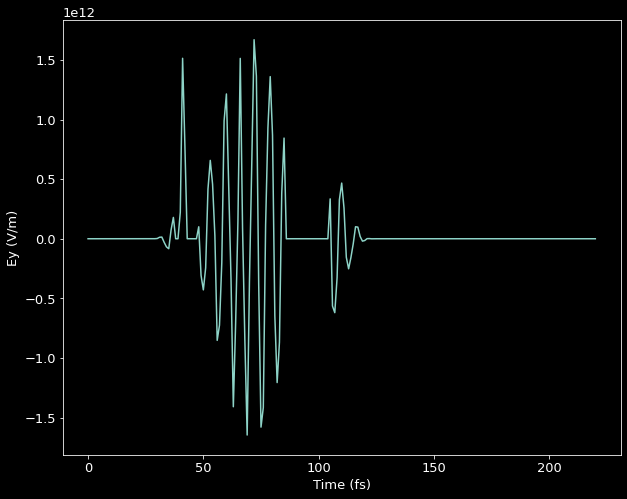

In [41]:
dt = 0.3235
t = np.arange(0, 110, dt)
t2 = np.arange(0, len(Et1))
plt.plot(t2, Et1)
plt.xlabel("Time (fs)")
plt.ylabel("Ey (V/m)")
plt.show()

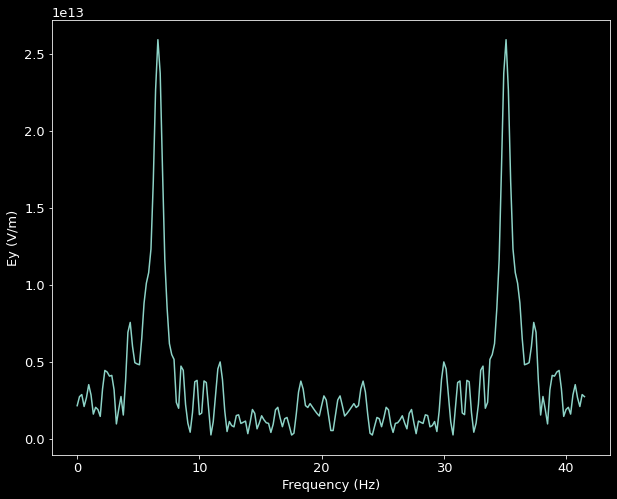

In [42]:
y = fft.fft(Et1)
# f_max = 1/dt
df = 2*np.pi/33.3
f = np.arange(0, len(y))*df
plt.plot(f, np.abs(y))
# plt.xlim(0, 1e14)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Ey (V/m)")
plt.show()


In [43]:
f_l = (3e8/1e-6)*1e-15
f_l

0.30000000000000004

In [44]:
df = 2*np.pi/33.3
f = np.arange(0, len(y))*df
f_max = max(f)
y = fft.fft(Et1)
yshift = fft.fftshift(y)
fshift = np.arange(-len(y)/2, len(y)/2)*df

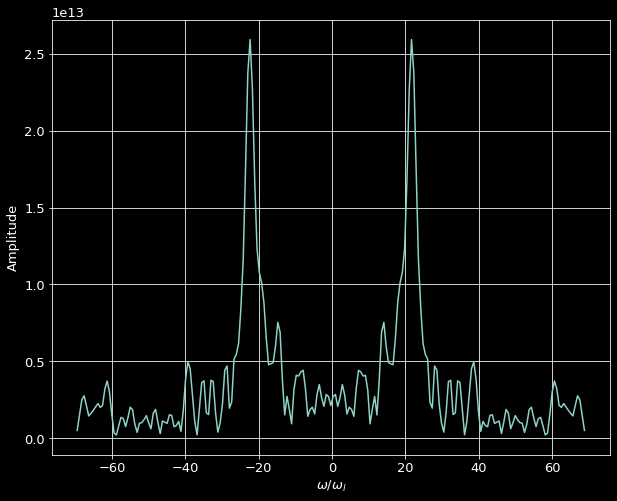

In [45]:
plt.plot(fshift/f_l, np.abs(yshift))
plt.xlabel('$\omega/\omega_l$')
plt.ylabel('Amplitude')
plt.grid()
# plt.xlim(0,30)
plt.show()